# Regression 3

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

## Read Data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
data = pd.read_csv("assignment3_creditcard.csv")

In [12]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28678 entries, 0 to 28677
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      28678 non-null  float64
 1   V2      28678 non-null  float64
 2   V3      28678 non-null  float64
 3   V4      28678 non-null  float64
 4   V5      28678 non-null  float64
 5   V6      28678 non-null  float64
 6   V7      28678 non-null  float64
 7   V8      28678 non-null  float64
 8   V9      28678 non-null  float64
 9   V10     28678 non-null  float64
 10  V11     28678 non-null  float64
 11  V12     28678 non-null  float64
 12  V13     28678 non-null  float64
 13  V14     28678 non-null  float64
 14  V15     28678 non-null  float64
 15  V16     28678 non-null  float64
 16  V17     28678 non-null  float64
 17  V18     28678 non-null  float64
 18  V19     28678 non-null  float64
 19  V20     28678 non-null  float64
 20  V21     28678 non-null  float64
 21  V22     28678 non-null  float64
 22

In [14]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


In [15]:
X = data.drop(['Class'], axis=1)
y = data['Class']
features_name = X.columns.to_list()

### Missing Values

In [16]:
import klib

klib.missingval_plot(X)

No missing values found in the dataset.


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (28), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='V20', ylabel='Density'>

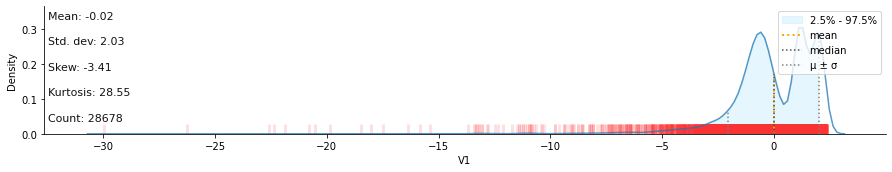

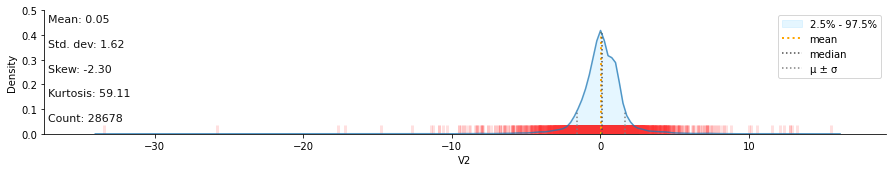

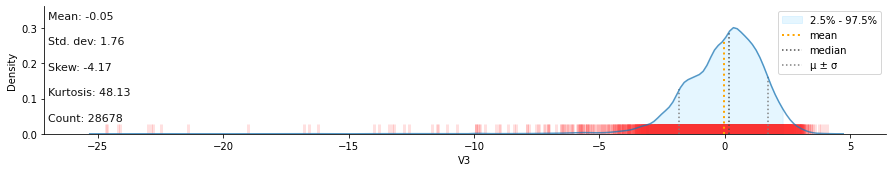

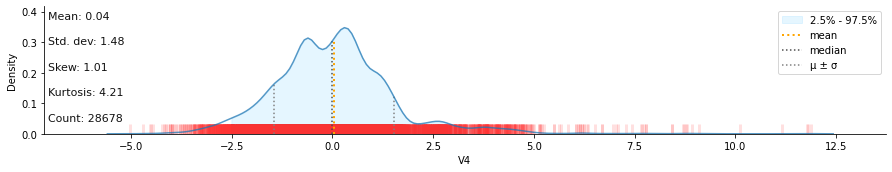

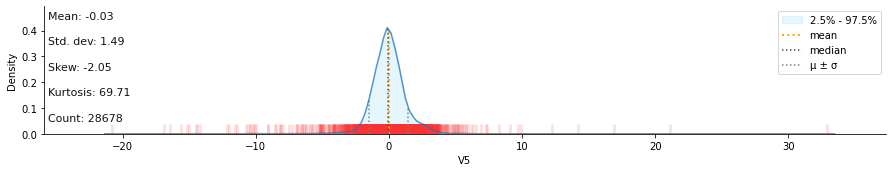

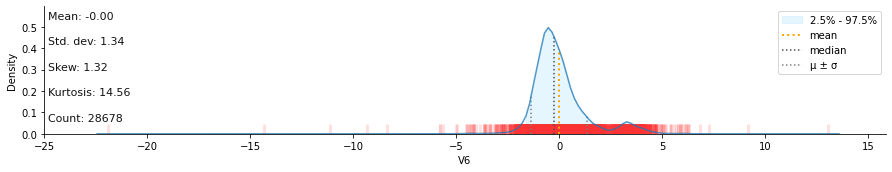

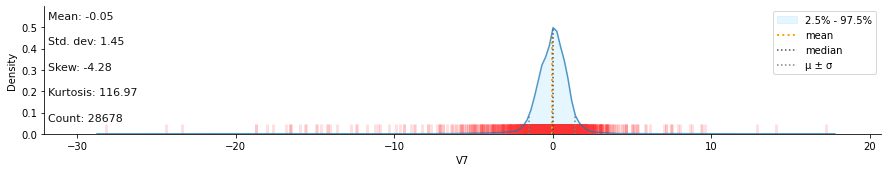

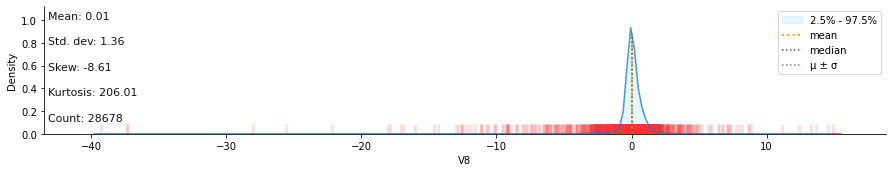

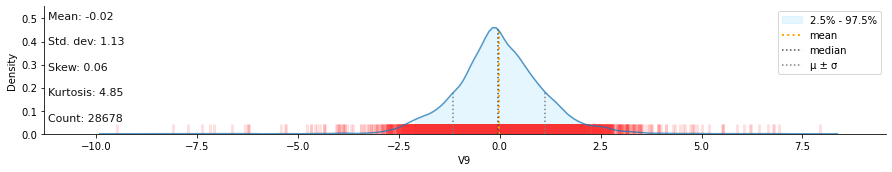

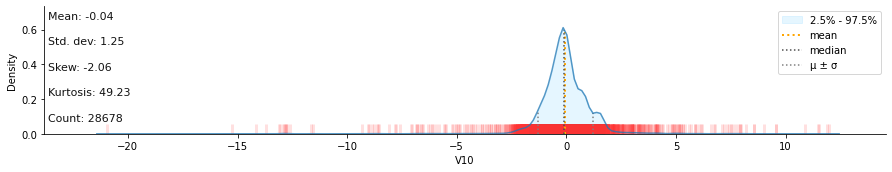

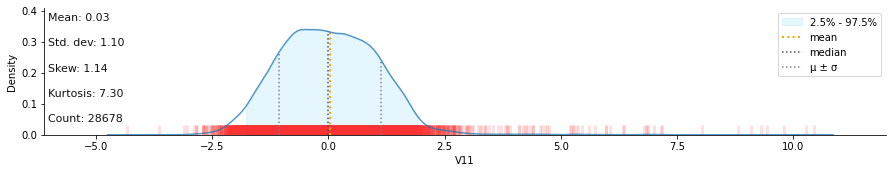

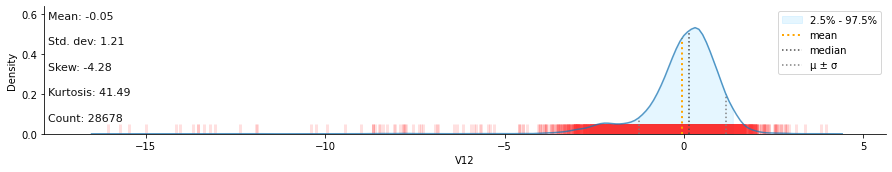

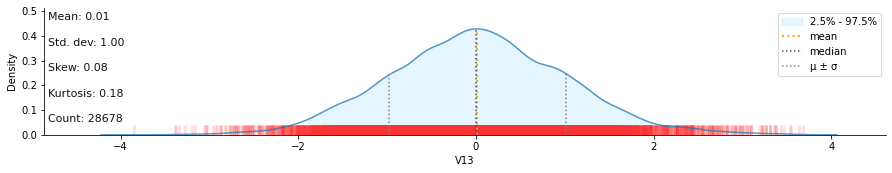

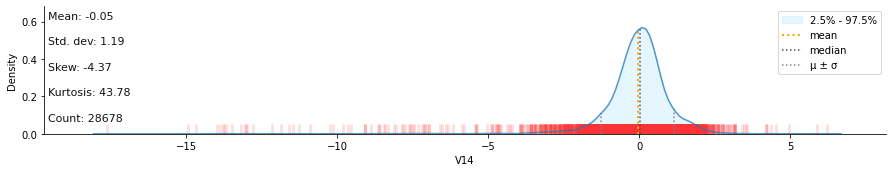

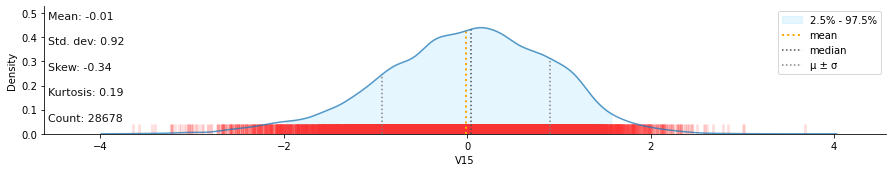

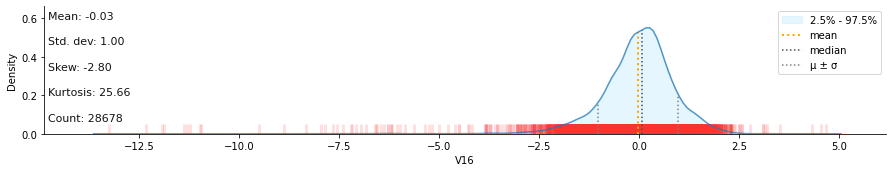

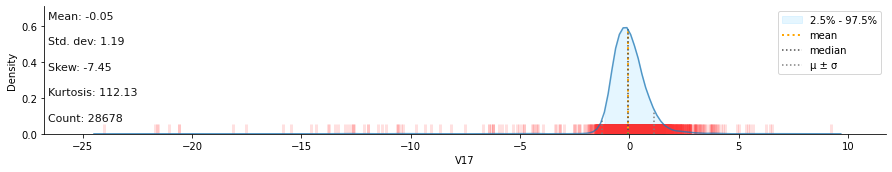

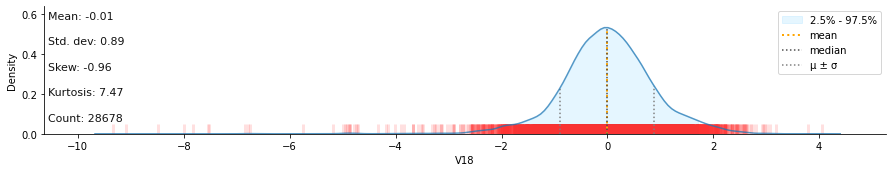

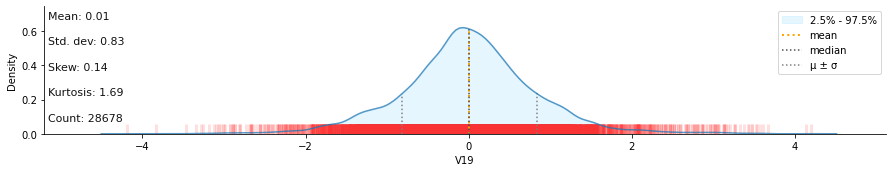

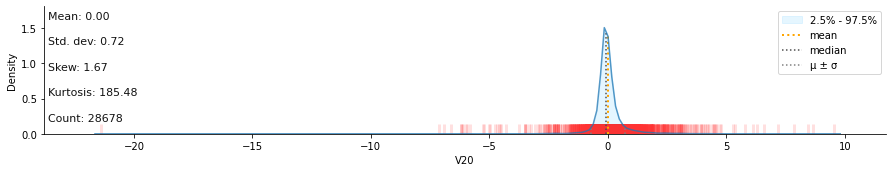

In [17]:
klib.dist_plot(X)

#### skewed한 분포를 나타내고 있는 variable들이 있음

### Target Distribution

<AxesSubplot:xlabel='Class', ylabel='count'>

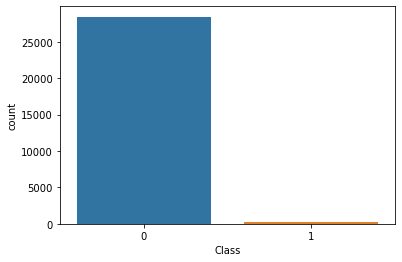

In [18]:
sns.countplot(data['Class'])

- 심한 imblanced data (정확도는 data 분포가 imbalanced한 상황에서는 x)
- 이 data는 fraud에 대한 데이터이므로 fraud를 잘 예측해야함.(차라리 0으로 예측하는것이 좋음)
- 정확도보다는 정밀도, 재현율이 중요함 

### Correlation

Displaying absolute correlations above the threshold (0.3). Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

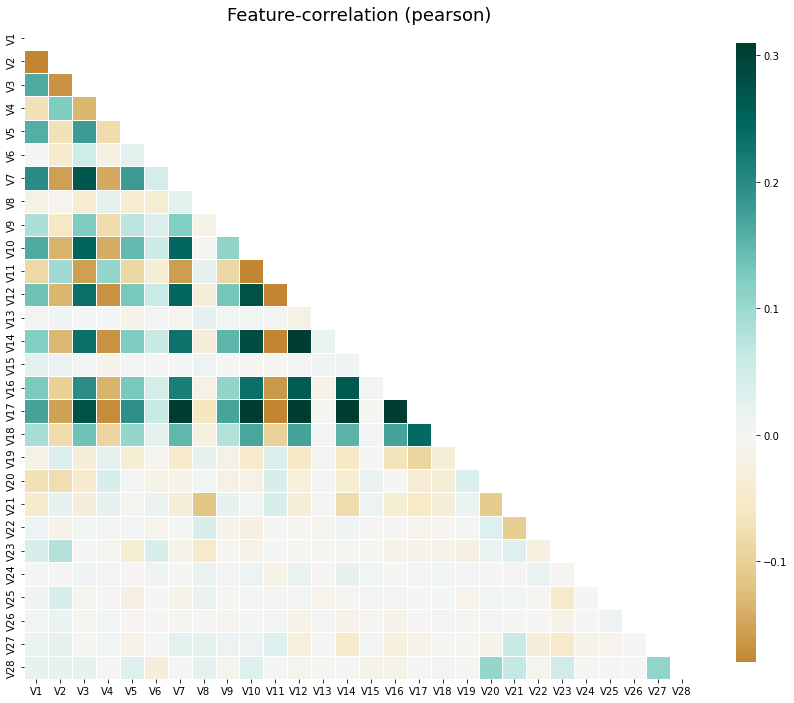

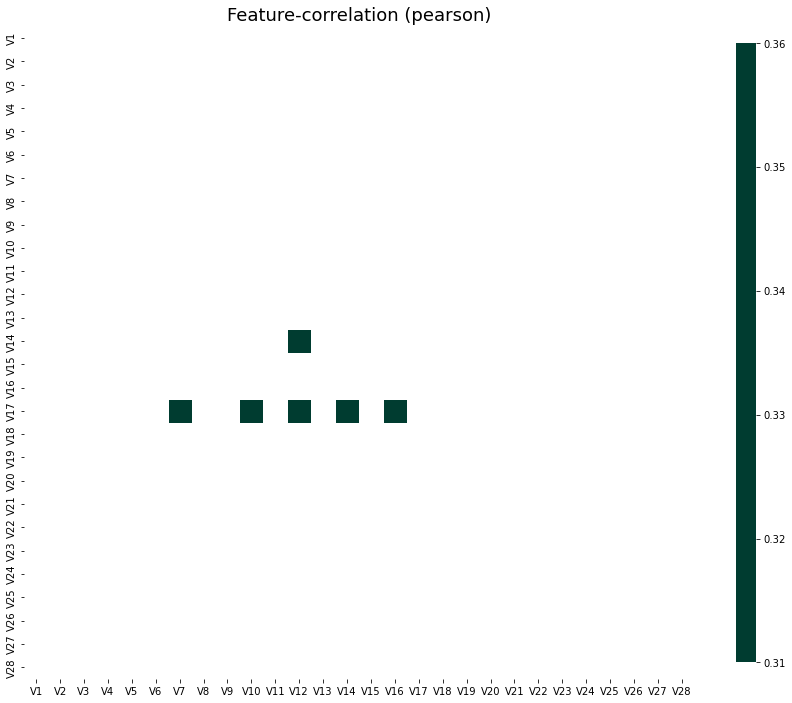

In [19]:
klib.corr_plot(X, annot = False, figsize=(15,12))
klib.corr_plot(X, split='high', annot = False, figsize=(15,12))

## Data Preprocessing

### Deal with outlier

In [20]:
X = X.apply(lambda x : x.clip(x.quantile(.05), x.quantile(.95), axis=0))
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.848212,1.888160,0.379573,1.048381,-0.845070,2.537837,-1.488712,-0.804911,-1.504967,-1.386383,...,0.159752,0.830218,-0.504098,0.859364,0.423231,-0.506985,0.754665,-0.627751,-0.017753,0.261546
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.922707,-0.093244,-0.065615
2,-2.964089,-1.896047,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.386383,...,-0.885471,0.830218,0.373760,-0.385777,0.489323,0.407229,0.008013,0.762362,-0.299024,-0.303929
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.419048,1.393727,-0.804911,-1.249272,1.079608,...,-0.531789,-0.546982,-0.004199,1.015108,-0.026748,0.077115,-0.832892,0.751700,0.390989,0.261546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,0.137028,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058
28674,1.264844,-1.228616,1.579098,-0.204514,-1.736515,0.546495,-1.488712,0.470377,1.002209,0.274005,...,0.643614,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,0.104002,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.057182,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.417418,-0.312999


### Transform Variable

In [21]:
X = pd.DataFrame(PowerTransformer(standardize=True).fit_transform(X), columns=features_name)
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.281433,1.907303,0.194780,0.863765,-0.835530,1.764099,-1.856973,-2.154309,-1.578502,-1.924195,...,0.217298,2.061702,-1.882125,1.309605,1.716253,-0.962136,1.778012,-1.612846,-0.168005,2.124130
1,1.418679,-0.574654,-1.137700,-0.403533,0.083950,-0.405535,-0.075560,-0.683775,1.265442,-0.348632,...,0.918149,-0.068187,0.249815,0.602232,0.206286,1.131394,0.181543,1.835740,-0.570091,-0.599482
2,-1.872526,-1.909418,0.917931,0.056417,-1.185369,0.018362,0.712340,1.186523,0.500594,-1.924195,...,-1.256192,2.061702,1.340031,-0.601685,1.969044,0.699372,-0.027370,1.582797,-1.641139,-2.151624
3,-1.076570,1.527543,0.120605,0.708556,-0.484898,-0.608150,0.619509,1.016446,-0.795667,0.518180,...,0.944944,0.310361,0.505037,0.625706,-0.449181,0.999386,-0.529965,-0.968871,0.073643,-1.185855
4,-0.361201,-0.410140,-1.593351,-0.670077,0.180546,-1.862517,1.869978,-2.154309,-1.301306,1.376997,...,-0.762466,-2.103053,0.083223,1.541875,-0.074679,0.021661,-1.828116,1.565468,2.100410,2.124130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,1.411528,-0.087028,-0.870239,0.383616,0.002500,-1.431834,0.298428,-1.027809,0.469266,0.174082,...,0.184726,-0.405058,-0.954831,-0.983095,1.360646,0.008464,-0.646198,0.542030,-0.419824,-0.545065
28674,0.759084,-1.290859,1.281625,-0.109973,-1.878347,0.769854,-1.856973,0.873146,1.089163,0.456521,...,0.916178,-0.239605,0.600262,1.098694,-0.123357,0.072843,0.754712,0.096378,0.414363,0.038371
28675,1.419397,0.090727,-1.340838,0.359782,0.616148,-0.689776,0.302910,-0.751007,0.440151,-0.436638,...,0.137434,-0.092142,-1.285976,-1.440935,1.255700,0.686881,-0.520687,0.511448,-0.388154,-0.332603
28676,-0.616074,1.308961,1.204133,1.574808,1.073442,0.859963,1.122969,-1.239108,-0.689042,1.805400,...,0.070483,0.287151,0.485170,0.697856,-1.474706,-1.342598,-0.838062,0.347615,-2.242831,-2.205238


## Modeling

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 0)

In [24]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

#### 예측값

In [25]:
y_pred = lr_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
lr_clf.score(X_test, y_test)

0.9991283124128313

#### 0으로 분류될 확률, 1로 분류될 확률

In [27]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba

array([[9.99607867e-01, 3.92133290e-04],
       [9.98245499e-01, 1.75450124e-03],
       [9.95950353e-01, 4.04964665e-03],
       ...,
       [9.99854529e-01, 1.45470841e-04],
       [9.99209781e-01, 7.90219370e-04],
       [9.99986156e-01, 1.38444114e-05]])

In [28]:
prob1 = [prob[1] for prob in lr_clf.predict_proba(X_test)]

cross_entropy = {
    'y_test' : y_test, # 실제값
    'y_pred' : y_pred, # 예측값
    'prob' : prob1,     # 1로 예측할 확률
}

cross_entropy = pd.DataFrame(cross_entropy)

In [29]:
cross_entropy.head()

,y_test,y_pred,prob
2124,0,0,0.000392
5521,0,0,0.001755
21800,0,0,0.004050
16959,0,0,0.000126
27369,0,0,0.000061


In [30]:
y_ = cross_entropy['y_test'].to_numpy()
y_hat = cross_entropy['y_pred'].to_numpy()

#### Cross Entropy

In [31]:
-np.sum((y_ * np.log(y_hat) + (1-y_) * np.log(1-y_))) / cross_entropy.shape[0]

nan

### Metrics Evaluation

In [32]:
from sklearn.metrics import *

In [33]:
def get_clf_eval(y_test, y_pred) :
  confusion = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  print('오차행렬')
  print(confusion)
  print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy,precision,recall))

In [34]:
get_clf_eval(y_test, y_pred)

오차행렬
[[5693    1]
 [   4   38]]
정확도:0.9991, 정밀도:0.9744, 재현율:0.9048


#### - Precision : 0.9744( 모델이 True라고 분류한 것 중 실제 True )
#### - recall : 0.9048 ( 실제 True인 것 중 모델이 True )

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5693,    1],
       [   4,   38]])

In [36]:
print('True Negative :', cm[0][0], '-> 0인데 1이라고 예측')
print('False Positive :', cm[0][1], '-> 0인데 1이라고 예측')
print('False Negative :', cm[1][0], '-> 1인데 0이라고 예측')
print('True Positive :', cm[1][1], '-> 1인데 1이라고 예측')

True Negative : 5693 -> 0인데 1이라고 예측
False Positive : 1 -> 0인데 1이라고 예측
False Negative : 4 -> 1인데 0이라고 예측
True Positive : 38 -> 1인데 1이라고 예측


#### Threshold 

In [37]:
from sklearn.preprocessing import Binarizer

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("\n임곗값 :", custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


임곗값 : 0.4
오차행렬
[[5692    2]
 [   4   38]]
정확도:0.9990, 정밀도:0.9500, 재현율:0.9048

임곗값 : 0.45
오차행렬
[[5693    1]
 [   4   38]]
정확도:0.9991, 정밀도:0.9744, 재현율:0.9048

임곗값 : 0.5
오차행렬
[[5693    1]
 [   4   38]]
정확도:0.9991, 정밀도:0.9744, 재현율:0.9048

임곗값 : 0.55
오차행렬
[[5694    0]
 [   4   38]]
정확도:0.9993, 정밀도:1.0000, 재현율:0.9048

임곗값 : 0.6
오차행렬
[[5694    0]
 [   4   38]]
정확도:0.9993, 정밀도:1.0000, 재현율:0.9048


### $\beta$ 

In [38]:
column_name = ['const'] + X.columns.to_list()
beta = np.concatenate([lr_clf.intercept_, lr_clf.coef_.reshape(-1)]).round(2)
odds = np.exp(beta).round(2)
interpret = np.where(beta>0, 1, 0)

In [39]:
beta_analysis = pd.DataFrame(np.c_[beta, odds, interpret], index = column_name,
                             columns = ['beta', 'odds(beta)', 'interpret'])
beta_analysis

,beta,odds(beta),interpret
const,-8.05,0.00,0.0
V1,-0.15,0.86,0.0
V2,-0.15,0.86,0.0
V3,-0.29,0.75,0.0
V4,1.61,5.00,1.0
V5,-0.10,0.90,0.0
V6,-0.18,0.84,0.0
V7,-0.53,0.59,0.0
V8,-0.59,0.55,0.0
V9,-0.28,0.76,0.0


In [40]:
X_beta = np.matmul(np.c_[np.ones(X_test.shape[0]), X_test], beta.reshape(-1,1))

P_1 = 1/(1+np.exp(-X_beta))
P_1

array([[3.91999475e-04],
       [1.81703057e-03],
       [4.01168078e-03],
       ...,
       [1.46035004e-04],
       [7.89819687e-04],
       [1.38115848e-05]])

#### cut off

In [41]:
Cut_off=np.linspace(0.01,0.99,10) 
for cutoff in Cut_off:
  y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)
  acc=accuracy_score(y_true=y_test,y_pred=y_pred) 
  recall=recall_score(y_true=y_test,y_pred=y_pred) 
  precision=precision_score(y_true=y_test,y_pred=y_pred)

  print(f"정확도 : {acc : 0.2f}",f"민감도 : {recall : 0.2f}",f"정밀도 : {precision : 0.2f}",f"cut off : {cutoff : 0.2f}")

정확도 :  0.97 민감도 :  1.00 정밀도 :  0.22 cut off :  0.01
정확도 :  1.00 민감도 :  0.90 정밀도 :  0.83 cut off :  0.12
정확도 :  1.00 민감도 :  0.90 정밀도 :  0.95 cut off :  0.23
정확도 :  1.00 민감도 :  0.90 정밀도 :  0.95 cut off :  0.34
정확도 :  1.00 민감도 :  0.90 정밀도 :  0.97 cut off :  0.45
정확도 :  1.00 민감도 :  0.90 정밀도 :  1.00 cut off :  0.55
정확도 :  1.00 민감도 :  0.90 정밀도 :  1.00 cut off :  0.66
정확도 :  1.00 민감도 :  0.88 정밀도 :  1.00 cut off :  0.77
정확도 :  1.00 민감도 :  0.88 정밀도 :  1.00 cut off :  0.88
정확도 :  0.99 민감도 :  0.14 정밀도 :  1.00 cut off :  0.99


#### f1_score ( Precision과 Recall의 평균 )

In [42]:
f1_score(y_pred, y_test)

0.25

## Version 2

### Confusion Matrix

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [44]:
p = fn + tp
n = tn + fp

#### Accuracy : 전체 데이터 중에서 맞게 분류된 데이터의 비율

In [45]:
accuracy = (tp + tn) / (p + n)
print('Accuracy', accuracy)

Accuracy 0.9937238493723849


#### Recall(재현율) : 원래 positive data에서 positive로 분류된 비율 

In [46]:
recall = (tp) / p
print('Recall', recall)

Recall 0.14285714285714285


#### Precision(정밀도) : Positive로 예측한 data에서 실제 positive인 비율

In [47]:
precision = tp / (tp + fp)
print('Precision : ', precision)

Precision :  1.0


#### Specificity(특이도) : negative로 예측한 data에서 실제 negative인 비율

In [50]:
specificity = tn / (tn + fn)
print('specificity : ', specificity)

specificity :  0.993717277486911


#### f1_score : recall과 precision의 조화평균

In [51]:
f1 = f1_score(y_pred, y_test)
print('f1_score : ',f1)

f1_score :  0.25


#### ROC curve : threshold 조정

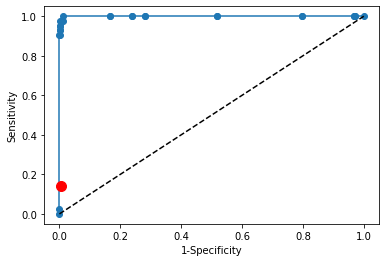

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.decision_function(X_test))

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

#### AUC : AUC는 ROC 곡선 아래의 넓이 1에 가까울 수록 좋은 모델

In [54]:
from sklearn.metrics import auc
print("auc : ", auc(fpr, tpr))

auc :  0.9995191262314549
